# FM-223: Lista 7

Aluno: Vinícius Freitas de Almeida

# Exercício 1

Computer Experiment 5.1

Plot the orbit of the two-dimensional Tinkerbell map

$$f(x,y) = (x^2 - y^2 + c_1 x + c_2 y, 2xy + c_3 x + c_4 y)$$

With $c_1 = -0.3$, $c_2 = -0.6$, $c_3 = 2$, $c_4 = 0.5$ and initial value $(x,y) = (0.1, 0.1)$.

The orbit tends toward an oval-shaped quasiperiodic attractor. Find out what replaces the quasiperiodic attractor when parameter $c_4$ is decreased or increased.

In [2]:
from numba import njit
import numpy as np
import matplotlib.pyplot as plt

@njit
def f(x: float, y: float, c4: float) -> tuple[float]:
    return (x**2 - y**2 - 0.3 * x - 0.6 * y, 2 * x * y + 2 * x + c4 * y)

In [3]:
def gen_orbit(x0: float, y0: float, c4: float, n: int) -> tuple[np.ndarray]:
    x, y = x0, y0
    result_x = np.empty(n)
    result_y = np.empty(n)
    for i in range(n):
        x, y = f(x, y, c4)
        result_x[i] = x
        result_y[i] = y
    return result_x, result_y

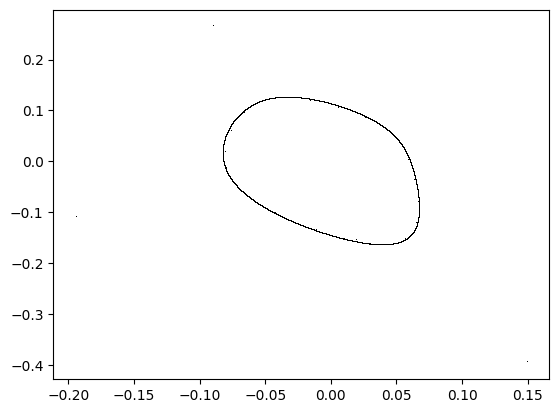

In [4]:
x, y = gen_orbit(0.1, 0.1, 0.45, 100_000)
plt.plot(x, y, 'k,')

/tmp/ipykernel_407471/2013719427.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')
/tmp/ipykernel_407471/2013719427.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='c4')


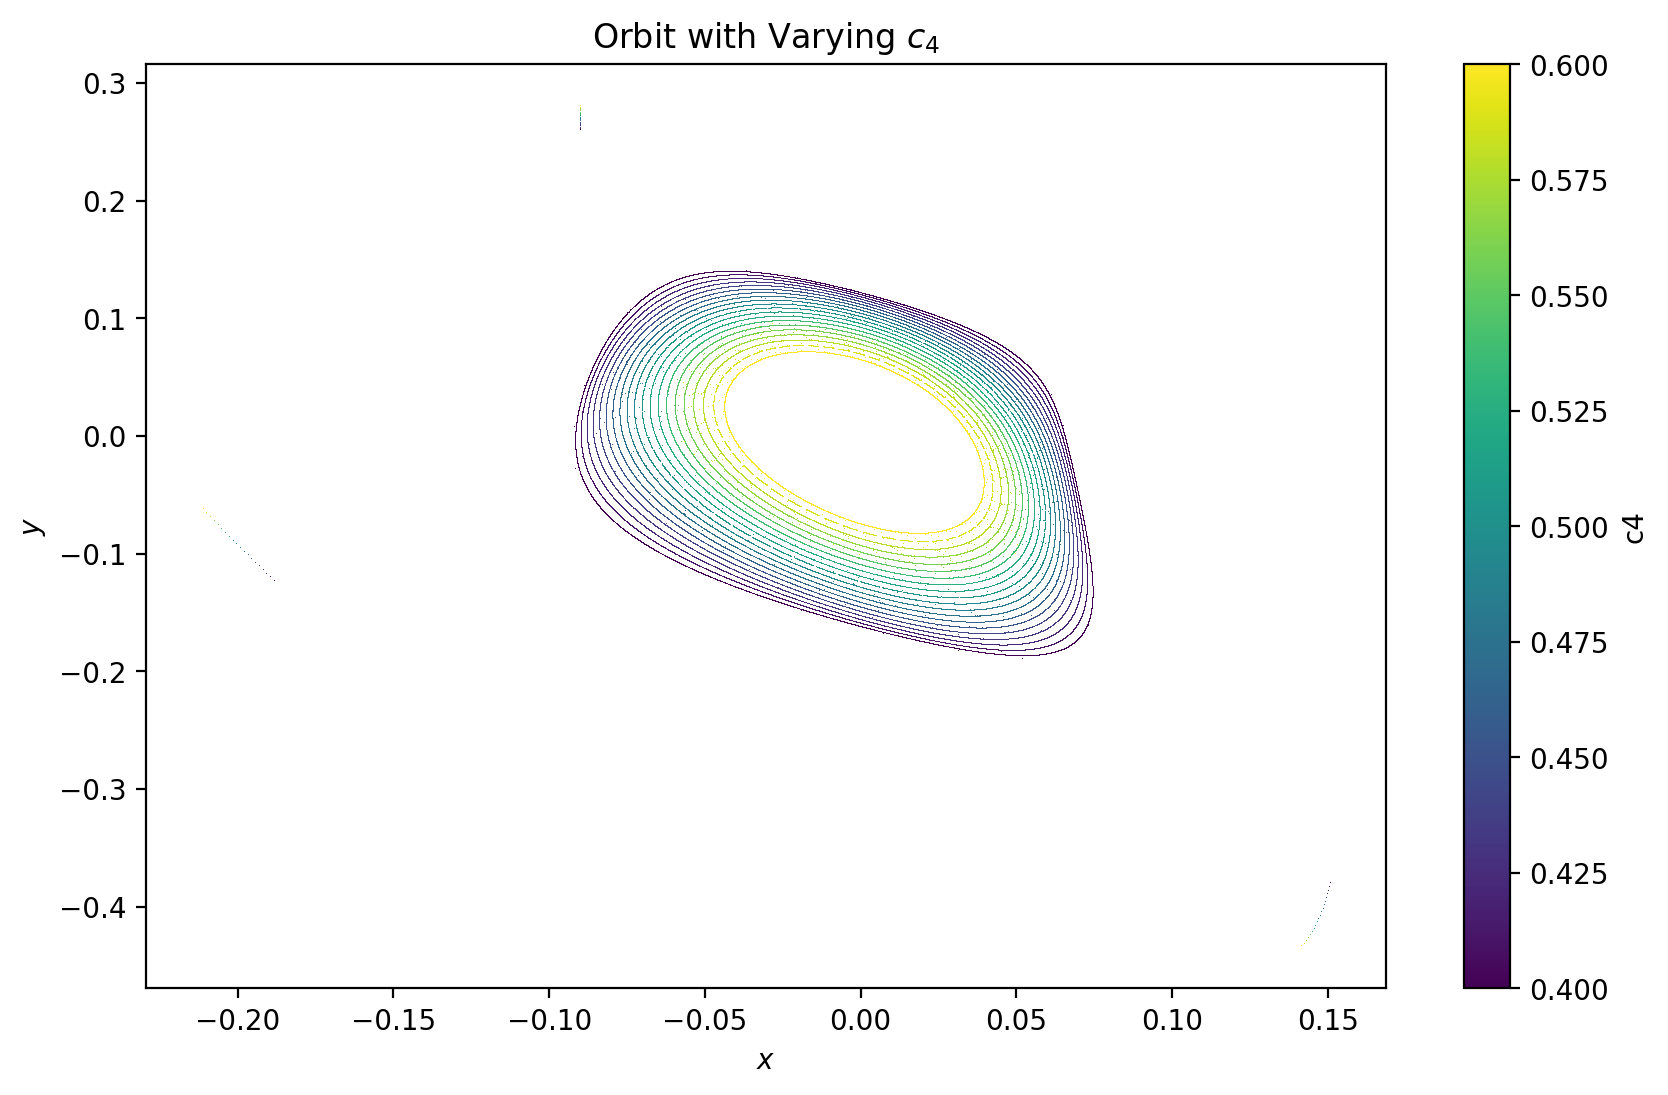

In [5]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
c4_values = np.linspace(0.4, 0.6, 20)

norm = Normalize(vmin=min(c4_values), vmax=max(c4_values))
colormap = plt.cm.get_cmap('viridis')
sm = ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  

plt.figure(figsize=(10, 6), dpi=200) 

for c4 in c4_values:
    x, y = gen_orbit(0.1, 0.1, c4, 10_000)
    plt.plot(x, y, ',', color=colormap(norm(c4)))

cbar = plt.colorbar(sm, label='c4')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Orbit with Varying $c_4$')
plt.show()

# Exercício 2

Escolha uma função $f(x)$ derivável qualquer e calcule o erro da aproximação numérica da derivada de $f$ em função de $dx$:

$$E(\delta x) = \left| f'(x) - \frac{f(x + \delta x) - f(x)}{\delta x}\right|$$

**Resolução**: Seja $f(x) = x^2$, etão $f'(x) = 2x$. Aproximando a derivada de $f$ por diferenças finitas, temos:

$$f'(x) \approx \frac{f(x + \delta x) - f(x)}{\delta x}$$

Vamos calcular o erro nessa aproximação.

Text(0, 0.5, '$E(\\delta x)$ for $f(x) = x^2$ at $x_0$ = 1.0')

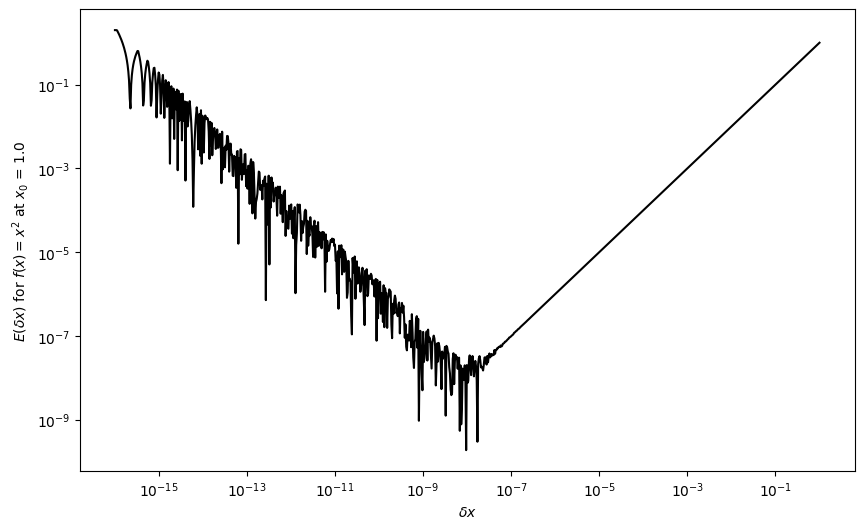

In [6]:
def err(f: callable, fprime: callable, x: float, h: float) -> float:
    return abs(fprime(x) - (f(x + h) - f(x)) / h)


# arbitrary x0
x0 = 1.0

# f(x) = x^2
f = lambda x: x**2
fprime = lambda x: 2*x

dx = np.logspace(-16, 0, 1000)
err_dx = np.vectorize(lambda dx: err(f, fprime, x0, dx))

plt.figure(figsize=(10, 6), dpi=100)
plt.loglog(dx, err_dx(dx), 'k')
plt.xlabel('$\delta x$')
plt.ylabel(f'$E(\delta x)$ for $f(x) = x^2$ at $x_0$ = {x0}')

# Exercício 3

Escreva um programa para encontrar eps, o menor número que quando adicionado a 1 retorna um valor diferente de 1. Compare seu resultado com a função eps do Matlab ou Octave(ou do Python).

**Resolução**: O menor número que quando adicionado a 1 retorna um valor diferente de 1 é chamado de $\epsilon$ da máquina. Vamos calcular esse número.



In [7]:
from sys import float_info
print(f'Machine epsilon (system info): {float_info.epsilon}')

# find machine epsilon
eps = 1.0/2.0
while 1 + eps/2 > 1:
    eps = eps/2

print(f'Machine epsilon: {eps}')

Machine epsilon (system info): 2.220446049250313e-16
Machine epsilon: 2.220446049250313e-16


# Exercício 4

Implemente o algoritmo e calcule os expoentes de Lyapunov do exemplo 5.6.

Consider the Hénon map introduced in Chapter 2 with parameters $a = 1.4$
and $b = 0.3$. Typical initial conditions have Lyapunov exponents which can be
approximated by the method described above. Reasonably accurate approximations are $h_1 = 0.42$ and $h_2 = -1.62$.

**Resolução**: O mapa de Hénon é dado por:

$$f(x,y) = (a - x^2 + by, x)$$

Logo, sua dimensão é $m=2$ e, portanto, cada órbita tem 2 expoentes de Lyapunov. Vamos calcular esses expoentes.

In [8]:
def henon_jacobian(x: float, b: float) -> np.ndarray:
    return np.array([[-2 * x, b], [1, 0]], dtype=np.float64)

In [9]:
@njit
def henon_map(x: float, y: float, a: float, b: float) -> tuple[float]:
    new_x = a - x**2 + b*y
    new_y = x
    return new_x, new_y

Obs.: 
- A notação aqui usada utiliza índices que começam em 0, enquanto que no livro da Kathleen T. Alligood os índices começam em 1.
- Organiza-se os vetores $\{\bm{x}_0, \dots, \bm{x}_{n-1}\}$ como vetores-coluna
de uma matriz $\mathbf{X}$. Assim, $\bm{x}_i$ é a $i$-ésima coluna da matriz $\mathbf{X}$.

Descrição do algoritmo adaptada do livro da Kathleen T. Alligood:

1. Escolha um ponto inicial $\bm{v}_0$ e calcule a sua órbita $\{\bm{v}_k | \bm{v}_{k+1} = f(\bm{v}_k), k = 0, 1, 2, \dots n - 1\}$, com $n$ suficientemente grande.
2. Usando a base canônica para $\{\bm{w}_0^0, \dots, \bm{w}_{m-1}^0\}$ representada pela matriz $\mathbf{W}_0 = \mathbf{I}$, 
3. Defina cada matriz jacobiana como sendo $J_k = Df(\bm{v}_k)$ para cada ponto da órbita.
4. Inicialize $\lambda_i = 0, i = 0, \dots, m-1$. Esta será a nossa estimativa para os expoentes de Lyapunov.
5. Repita para $k = 0, \dots, n-1$:
    1. Calcule $\mathbf{Y}_{k} = J_{k} \mathbf{W}_{k}$.
    2. Usando ortogonalização de gram-schmidt nos vetores-coluna, atualize $\mathbf{Y}_{k} \leftarrow GS(\mathbf{Y}_{k})$.
    2. Para cada $i = 0, \dots, m-1$:
        - Atualize $\lambda_{i} \leftarrow \lambda_{i} + \ln ||\bm{y}_i^{k}||$.
    3. Calcule $\bm{w}_i^k = \frac{\bm{w}_i^k}{\|\bm{w}_i^k\|}$.
6. Calcule $\lambda_i \leftarrow \frac{\lambda_i}{n}$ para cada $i = 0, \dots, m-1$.
7. O resultado final é $\lambda_i$ para cada $i = 0, \dots, m-1$.

In [10]:
# Function to perform Gram-Schmidt orthogonalization in-place and without normalization
def gram_schmidt_inplace(matrix):
    num_columns = matrix.shape[1]
    
    for i in range(num_columns):
        v = matrix[:, i]
        for j in range(i):
            u = matrix[:, j]
            dot_product = np.dot(u, v)
            v -= dot_product * u / np.dot(u, u)

def calculate_lyapunov_exponents(x0: float, y0: float, a: float, b: float, m: int, n: int):
    W = np.eye(m)  # Initial basis matrix
    h = np.zeros(m)  # Lyapunov exponents

    # Iterate through the orbit
    for _ in range(n):
        # Calculate the Jacobian matrix
        J = henon_jacobian(x0, b)

        # Calculate Yk = Jk * Wk
        W = J @ W

        # Gram-Schmidt orthogonalization
        gram_schmidt_inplace(W)
        
        for i in range(m):
            norm = np.linalg.norm(W[:, i])
            # Update Lyapunov exponents
            h[i] += np.log(norm)
            # Normalize the columns of W
            W[:, i] /= norm
            
        # Update initial point using the Henon map
        x0, y0 = henon_map(x0, y0, a, b)

    # Average Lyapunov exponents
    h /= n

    return h

In [11]:
x0 = 0.1
y0 = 0.1
a = 1.4
b = 0.3
m = 2  
n = 10000

lyapunov_exponents = calculate_lyapunov_exponents(x0, y0, a, b, m, n)
print("Lyapunov exponents:", lyapunov_exponents)

Lyapunov exponents: [ 0.41735324 -1.62132605]


# Exercício 5

Calcule a dimensão de Lyapunov do mapa de Hénon e compare com o
valor da dimensão de contagem de caixas.

**Resolução**: De acordo com o livro, a dimensão de Lyapunov é dada por:

Let $f$ be a map on $\mathbb{R}^m$. Consider an orbit with Lyapunov exponents $h_1 \geq \dots \geq h_m$, and let $p$ denote the largest integer such that
\begin{equation}
\sum_{i=1}^{p} h_i \geq 0.
\end{equation}

Define the Lyapunov dimension $D_L$ of the orbit by
\begin{equation}
D_L = 
\begin{cases}
0 & \text{if no such } p \text{ exists} \\
p + \frac{1}{\left| h_{p+1} \right|} \sum_{i=1}^{p} h_i & \text{if } p < m \\
m & \text{if } p = m
\end{cases}
\end{equation}

In the case of a two-dimensional map with $h_1 > 0 > h_2$ and $h_1 + h_2 < 0$ (for example, the Hénon map and the skinny baker map), (5.8) yields
\begin{equation}
D_L = 1 + \frac{h_1}{\left| h_2 \right|}.
\end{equation}

In [26]:
# Lyapunov dimension of the Henon map
dl = 1 + lyapunov_exponents[0] / np.abs(lyapunov_exponents[1])
print("Lyapunov dimension:", dl)

Lyapunov dimension: 1.257414751790996


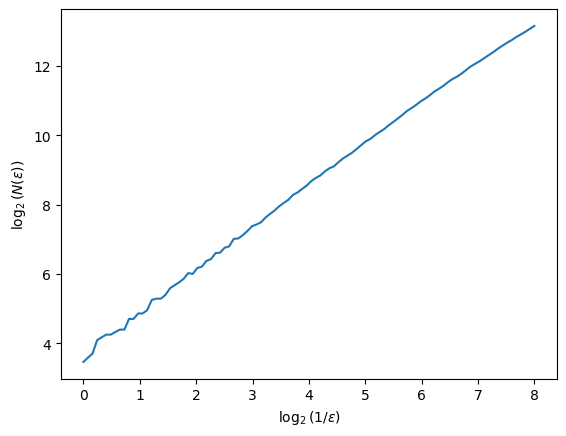

In [27]:
from scipy import stats

def generate_henon_attractor(a, b, n, cutoff) -> (np.ndarray, np.ndarray):
    x = np.ones(n) * 0.1
    y = np.ones(n) * 0.1
    for i in range(n-1):
        x[i+1] = a - x[i] * x[i] + b * y[i]
        y[i+1] = x[i]

    x = x[cutoff:]
    y = y[cutoff:]

    # filter x to only x's such that |x| <= 2.5
    ids = np.where(np.abs(x) <= 2.5)
    y = y[ids]
    x = x[ids]

    return x, y

def count_hit_boxes(x, y, l):
    occupied_boxes = set()

    for i in range(len(x)):
        x_index = int(x[i] // l)
        y_index = int(y[i] // l)
        occupied_boxes.add((x_index, y_index))

    return len(occupied_boxes)

x, y = generate_henon_attractor(1.4, 0.3, 30000, 1000)
num = 100
eps = np.logspace(0, -8, base=2, num=num)
f = lambda l: count_hit_boxes(x, y, l)
n_eps = np.vectorize(f)(eps)

x_ = -np.log2(eps)
y_ = np.log2(n_eps)

plt.plot(x_, y_)
plt.xlabel("$\\log_2(1/\\varepsilon)$")
plt.ylabel("$\\log_2(N(\\varepsilon))$")
plt.show()

result = stats.linregress(x_, y_)
boxdim = result.slope

In [28]:
print(f"{boxdim=}")

boxdim=1.205822600277838


Percebe-se que a nossa estimativa da dimensão de Lyapunov é bem próxima da estimativa da dimensão de contagem de caixas para o mapa de Hénon.